In [2]:
# from src.main import main
import json
import numpy as np
from skimage.draw import polygon
import cv2
import matplotlib.pyplot as plt

In [3]:
json_file = open("data/shapes_to_sg_only.json")
polygons = json.load(json_file)
# polygons['_via_img_metadata']['View_from_Second_Link_at_Tuas.jpg238942']['filename'][:-4] # fname


In [16]:
vertices_dict = {}

for k, v in polygons['_via_img_metadata'].items():
    text = v['filename'][:-4]
    print (v['regions'][0]['shape_attributes']['all_points_x'])
    vertices_dict[text] = {'all_points_x': v['regions'][0]['shape_attributes']['all_points_x'],
                           'all_points_y': v['regions'][0]['shape_attributes']['all_points_y']
    }

print (vertices_dict)

[44, 838, 1148, 1310, 1434, 1564, 1655, 1743, 1823, 1918, 1915, 269, 183]
[0, 2, 424, 1260, 1423, 1566, 1686]
[1913, 1142, 806, 524, 116, 5, 713, 858, 1913, 1918, 1915]
[1085, 876, 767, 729, 635, 561, 445, 427, 420, 322, 288, 216, 284, 327, 313, 318]
{'View_from_Second_Link_at_Tuas': {'all_points_x': [44, 838, 1148, 1310, 1434, 1564, 1655, 1743, 1823, 1918, 1915, 269, 183], 'all_points_y': [6, 281, 396, 442, 464, 513, 563, 614, 681, 666, 381, 0, 2]}, 'View_from_Tuas_Checkpoint': {'all_points_x': [0, 2, 424, 1260, 1423, 1566, 1686], 'all_points_y': [0, 806, 697, 200, 125, 91, 11]}, 'View_from_Woodlands_Causeway_Towards_Johor': {'all_points_x': [1913, 1142, 806, 524, 116, 5, 713, 858, 1913, 1918, 1915], 'all_points_y': [277, 697, 840, 940, 1005, 1042, 1069, 992, 365, 354, 277]}, 'View_from_Woodlands_Checkpoint_Towards_BKE': {'all_points_x': [1085, 876, 767, 729, 635, 561, 445, 427, 420, 322, 288, 216, 284, 327, 313, 318], 'all_points_y': [1060, 715, 665, 610, 601, 531, 361, 229, 16, 16, 

In [19]:
xs = polygons['_via_img_metadata']['View_from_Second_Link_at_Tuas.jpg238942']['regions'][0]['shape_attributes']['all_points_x']
ys = polygons['_via_img_metadata']['View_from_Second_Link_at_Tuas.jpg238942']['regions'][0]['shape_attributes']['all_points_y']

In [49]:
vertices = np.array(list(zip(xs, ys)))

img = cv2.imread("data/View_from_Second_Link_at_Tuas.jpg")
masked = np.zeros((img.shape[0], img.shape[1]), 'uint8')
rr, cc = polygon(vertices[:,1], vertices[:,0], img.shape)
masked[rr,cc] = 1

In [62]:
img_masked_sg = np.where(masked[:,:, None] == 0, img * 0, img)
img_masked_johor = np.where(masked[:,:, None] == 0, img, img * 0)

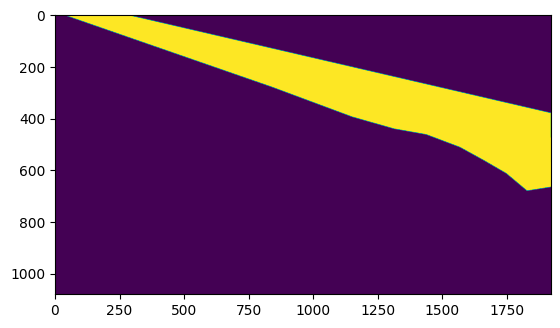

In [51]:
plt.imshow(masked[...,::-1])

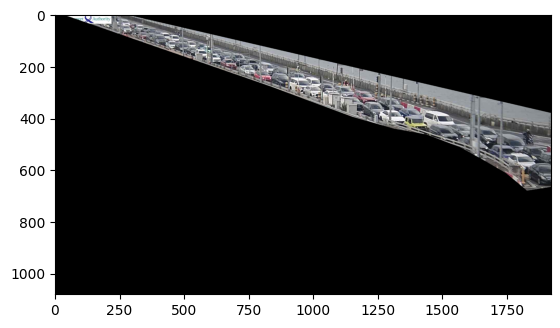

In [57]:
plt.imshow(img_masked_sg[...,::-1])

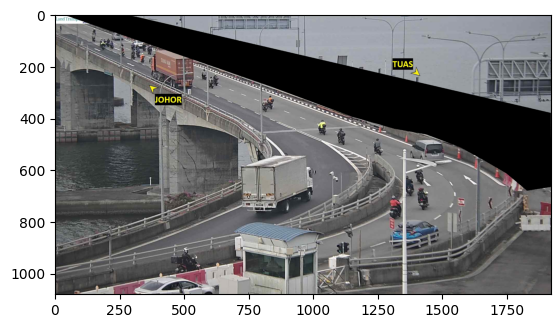

In [63]:
plt.imshow(img_masked_johor[...,::-1])